Install the necessary libraries

In [1]:
!pip install PyTDC mols2grid 

In [2]:
from rdkit import Chem
from tdc.single_pred import ADME
import mols2grid
from rdkit.Chem.Draw import MolsToGridImage
import useful_rdkit_utils as uru

Instantiate a REOS object

In [3]:
reos = uru.REOS()

Get the path to the rules file

In [4]:
rule_path = reos.get_rule_file_location()
rule_path

PosixPath('/Users/pwalters/.data/useful_rdkit_utils/data/alert_collection.csv')

Get the number of entries in the rules file

In [5]:
reos.rule_df.shape

(1251, 8)

Get a list of available rule sets

In [6]:
reos.get_available_rule_sets()

array(['Glaxo', 'Dundee', 'BMS', 'PAINS', 'SureChEMBL', 'MLSMR',
       'Inpharmatica', 'LINT'], dtype=object)

Get the currently active rule sets

In [7]:
reos.get_active_rule_sets()

array(['Glaxo'], dtype=object)

Get the number of active rules

In [8]:
reos.active_rule_df.shape

(55, 8)

Set new active rule sets

In [9]:
reos.set_active_rule_sets(['BMS','PAINS'])

Get the new active rule sets

In [10]:
reos.get_active_rule_sets()

array(['BMS', 'PAINS'], dtype=object)

See how many rules are active

In [11]:
reos.active_rule_df.shape

(661, 8)

Read rules from a file

In [12]:
reos.read_rules(rule_path,['Glaxo'])

See how many rules are active

In [13]:
reos.active_rule_df.shape

(55, 8)

Get the active rule dataframe

In [14]:
reos.active_rule_df

,rule_id,rule_set,description,smarts,rule_set_name,priority,max,pat
0,1,1,R1 Reactive alkyl halides,"[Br,Cl,I][CX4;CH,CH2]",Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379dee0>
1,2,1,R2 Acid halides,"[S,C](=[O,S])[F,Br,Cl,I]",Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379de20>
2,3,1,R3 Carbazides,O=CN=[N+]=[N-],Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379ddc0>
3,4,1,R4 Sulphate esters,"COS(=O)O[C,c]",Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379dd60>
4,5,1,R5 Sulphonates,"COS(=O)(=O)[C,c]",Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379dd00>
5,6,1,R6 Acid anhydrides,C(=O)OC(=O),Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379dca0>
6,7,1,R7 Peroxides,OO,Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379dc40>
7,8,1,R8 Pentafluorophenyl esters,C(=O)Oc1c(F)c(F)c(F)c(F)c1(F),Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379dbe0>
8,9,1,R9 Paranitrophenyl esters,C(=O)Oc1ccc(N(=O)~[OX1])cc1,Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379db80>
9,10,1,R10 esters of HOBT,C(=O)Onnn,Glaxo,8,0,<rdkit.Chem.rdchem.Mol object at 0x14379db20>


Evaluate a SMILES

In [15]:
gleevec_smiles = "Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C"
reos.process_smiles(gleevec_smiles)

('ok', 'ok')

Evaluate a molecule

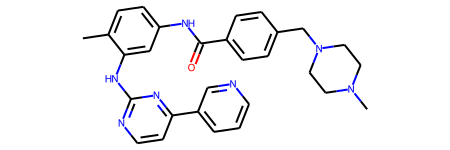

In [16]:
gleevec_mol = Chem.MolFromSmiles(gleevec_smiles)
gleevec_mol

In [17]:
reos.process_mol(gleevec_mol)

('ok', 'ok')

Get human intestinal absorption (HIA) data from the Therapeutic Data Commons (TDC)

In [18]:
hia_data = ADME(name = 'HIA_Hou').get_data()

Found local copy...
Loading...
Done!


In [19]:
hia_data.head()

,Drug_ID,Drug,Y
0,Acetanilide,CC(=O)Nc1ccccc1,1
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1


Use Pandas apply to evaluate all of the SMILES in the dataframe

In [20]:
hia_data[['rule_set_name','reos']] = hia_data.Drug.apply(reos.process_smiles).to_list()

In [21]:
hia_data

,Drug_ID,Drug,Y,rule_set_name,reos
0,Acetanilide,CC(=O)Nc1ccccc1,1,ok,ok
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,ok,ok
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,ok,ok
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,ok,ok
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1,ok,ok
...,...,...,...,...,...
573,Tiludronic_acid,O=P(O)(O)C(Cc1ccc(Cl)cc1)P(=O)(O)O,0,ok,ok
574,Zanamivir.mol,CC(=O)N[C@H]1[C@@H]([C@@H](O)[C@H](O)CO)OC(C(=...,0,ok,ok
575,Kanamycin.mol,CC(=O)NC[C@@H]1O[C@@H](O[C@H]2[C@@H](N)C[C@H](...,0,ok,ok
576,Amikacin.mol,NCC[C@@H](O)C(=O)N[C@@H]1C[C@H](N)[C@H](O[C@@H...,0,ok,ok


View summary stats

In [22]:
hia_data[['rule_set_name','reos']].value_counts()

rule_set_name  reos                                     
ok             ok                                           526
Glaxo          I16 Betalactams                               19
               R1 Reactive alkyl halides                      9
               I11 Benzylic quaternary Nitrogen               5
               R17 acylhydrazide                              5
               N2 Polyenes                                    4
               I6 Epoxides, Thioepoxides, Aziridines          3
               N5 Cycloheximide derivatives                   3
               I2 Compounds with 4 or more acidic groups      1
               I4 Disulphides                                 1
               N1 Quinones                                    1
               N3 Saponin derivatives                         1
dtype: int64

Browse the results

In [23]:
mols2grid.display(hia_data.sort_values(["rule_set_name","reos"]).query("reos != 'ok'"),
                  smiles_col="Drug",subset=["img","Drug_ID","reos","rule_set_name"])

A couple of settings to improve the RDKit rendering quality

In [24]:
uru.rd_make_structures_pretty()
uru.rd_enable_svg()

We can't (yet) highlight the matches with mols2grid, but we can do this with the RDKit's [MolsToGridImage](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html).

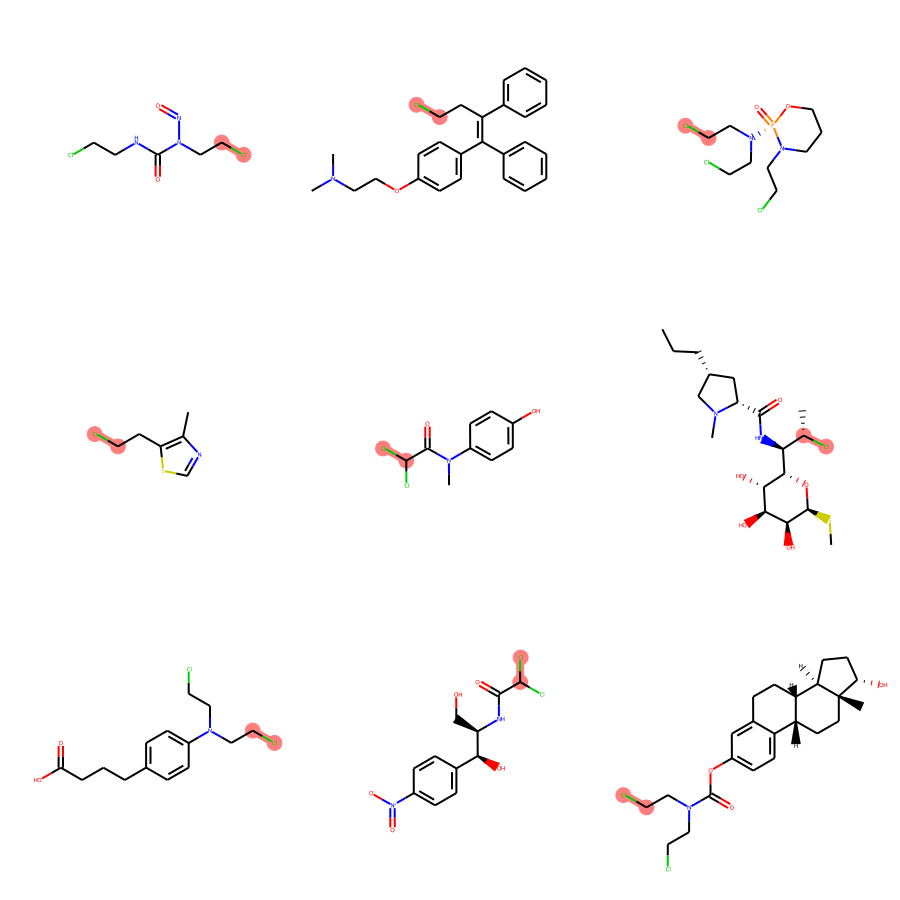

In [25]:
rule_set = "Glaxo"
rule_name = 'R1 Reactive alkyl halides'
query = reos.active_rule_df.query("rule_set_name == @rule_set and description == @rule_name").pat.values
img = None
if len(query) != 1:
    print(f"no query match for {rule_set}/{rule_name}")
else:
    query = query[0]
    smiles_list = hia_data.query("rule_set_name == @rule_set and reos == @rule_name").Drug
    mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
    match_list = [x.GetSubstructMatch(query) for x in mol_list]
    img = MolsToGridImage(mol_list,molsPerRow=3,highlightAtomLists=match_list,subImgSize=(300, 300))
img

Let's add some Rule of 5 properties to the dataframe.  First, we'll instantiate an Ro5Calculator.

In [41]:
ro5_calc = uru.Ro5Calculator()

Next add the properties to the dataframe.

In [32]:
hia_data[ro5_calc.names] = hia_data.Drug.apply(ro5_calc.calc_smiles).to_list()

In [33]:
hia_data

,Drug_ID,Drug,Y,rule_set_name,reos,MolWt,LogP,HBD,HBA,TPSA
0,Acetanilide,CC(=O)Nc1ccccc1,1,ok,ok,135.166,1.64500,1.0,1.0,29.10
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,ok,ok,222.251,-0.85610,2.0,6.0,115.04
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,ok,ok,400.647,6.58980,2.0,2.0,40.46
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,ok,ok,230.315,1.66969,1.0,4.0,36.95
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1,ok,ok,380.466,1.35302,3.0,6.0,110.88
...,...,...,...,...,...,...,...,...,...,...
573,Tiludronic_acid,O=P(O)(O)C(Cc1ccc(Cl)cc1)P(=O)(O)O,0,ok,ok,300.571,1.56400,4.0,2.0,115.06
574,Zanamivir.mol,CC(=O)N[C@H]1[C@@H]([C@@H](O)[C@H](O)CO)OC(C(=...,0,ok,ok,332.313,-3.57583,8.0,7.0,198.22
575,Kanamycin.mol,CC(=O)NC[C@@H]1O[C@@H](O[C@H]2[C@@H](N)C[C@H](...,0,ok,ok,526.540,-7.11400,11.0,15.0,285.69
576,Amikacin.mol,NCC[C@@H](O)C(=O)N[C@@H]1C[C@H](N)[C@H](O[C@@H...,0,ok,ok,585.608,-8.42420,13.0,17.0,331.94


With this in hand, we can define a query to select the molecules that pass our functional group filters and meet a set of property criteria. 

In [39]:
cpd_query = """reos == 'ok' and MolWt <= 500 and LogP <= 5 and HBD <= 5 and HBA <= 10 and TPSA <= 140"""

In [40]:
hia_data.query(cpd_query)

,Drug_ID,Drug,Y,rule_set_name,reos,MolWt,LogP,HBD,HBA,TPSA
0,Acetanilide,CC(=O)Nc1ccccc1,1,ok,ok,135.166,1.64500,1.0,1.0,29.10
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,ok,ok,222.251,-0.85610,2.0,6.0,115.04
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,ok,ok,230.315,1.66969,1.0,4.0,36.95
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1,ok,ok,380.466,1.35302,3.0,6.0,110.88
5,Anastrozole.mol,CC(C)(C#N)c1cc(Cn2cncn2)cc(C(C)(C)C#N)c1,1,ok,ok,293.374,2.92876,0.0,5.0,78.29
...,...,...,...,...,...,...,...,...,...,...
568,Hydrochlorothiazide.mol,NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O,1,ok,ok,297.745,-0.35130,3.0,5.0,118.36
569,Metolazone.mol,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N[C@@H]1C,1,ok,ok,365.842,2.71412,2.0,4.0,92.50
570,Reproterol,Cn1c(=O)c2c(ncn2CCCNC[C@@H](O)c2cc(O)cc(O)c2)n...,1,ok,ok,389.412,-0.44180,4.0,10.0,134.54
571,Tranexamic_acid.mol,NC[C@H]1CC[C@@H](C(=O)O)CC1,1,ok,ok,157.213,0.83610,2.0,2.0,63.32
